## 1. Import données

### 1.1 Import libraries

In [1]:
import os
import io
import itertools


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import io, img_as_float

### 1.2 Import données

In [2]:
PATH = os.getcwd()
PATH_Data = PATH+'/data/Test'
PATH_Result = PATH+'/data/Results'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Result: '+PATH_Result)

PATH:        /Users/zaccaria/Documents/Progetti/ocia/ociap11/P8_ex
PATH_Data:   /Users/zaccaria/Documents/Progetti/ocia/ociap11/P8_ex/data/Test
PATH_Result: /Users/zaccaria/Documents/Progetti/ocia/ociap11/P8_ex/data/Results


## 2. EDA

### 2.0 Functions EDA

In [ ]:
def print_directory_tree(path):
    """
    Affiche l'arborescence d'un répertoire donné et la première image de chaque sous-répertoire.
    Args:
        path (str): Le chemin du répertoire à afficher.
    """
    # Affiche le nom du répertoire racine
    print(f'📂 {os.path.basename(path)}')
    # Vérifie si le chemin donné est un répertoire
    if os.path.isdir(path):
        # Parcourt tous les fichiers/dossiers dans le répertoire
        for filename in sorted(os.listdir(path)):
            # Obtient le chemin complet du fichier/dossier
            sub_path = os.path.join(path, filename)
            # Vérifie si le sous-chemin est un répertoire
            if os.path.isdir(sub_path):
                # Affiche le nom du sous-répertoire
                print(f'    📁 {filename}')
                # Obtient la liste des fichiers dans le sous-répertoire
                sub_files = sorted([f for f in os.listdir(sub_path) if os.path.isfile(os.path.join(sub_path, f))])
                # Si le sous-répertoire contient des fichiers
                if sub_files:
                    # Obtient le chemin de la première image
                    img_path = os.path.join(sub_path, sub_files[0])
                    # Lit l'image
                    img = mpimg.imread(img_path)
                    # Crée une nouvelle figure pour l'image
                    plt.figure(figsize=(0.5, 0.5))  # ajuste la taille de l'image
                    # Affiche l'image
                    plt.imshow(img)
                    # Cache les axes
                    plt.axis('off')  # ne montre pas les axes
                    # Ajoute un titre à l'image
                    plt.title(f'Première image dans {filename}', fontsize=8)  # ajoute un titre à l'image
                    # Affiche l'image
                    plt.show()

In [ ]:
def print_directory_tree_count(path):
    """
    Affiche l'arborescence d'un répertoire donné et le nombre d'images dans chaque sous-répertoire.

    Args:
        path (str): Le chemin du répertoire à afficher.
    """
    # Affiche le nom du répertoire racine
    print(f'📂 {os.path.basename(path)}')

    # Vérifie si le chemin donné est un répertoire
    if os.path.isdir(path):
        # Parcourt tous les fichiers/dossiers dans le répertoire
        for filename in sorted(os.listdir(path)):
            # Obtient le chemin complet du fichier/dossier
            sub_path = os.path.join(path, filename)

            # Vérifie si le sous-chemin est un répertoire
            if os.path.isdir(sub_path):
                # Obtient la liste des fichiers image dans le sous-répertoire
                image_files = [f for f in os.listdir(sub_path) if os.path.isfile(os.path.join(sub_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

                # Affiche le nom du sous-répertoire et le nombre d'images qu'il contient
                print(f'    📁 {filename} - {len(image_files)} images')

In [ ]:
def class_distribution(path):
    """
    Affiche la distribution des classes d'images dans un répertoire donné.

    Args:
        path (str): Le chemin du répertoire à analyser.
    """
    # Initialise les listes pour stocker les noms des classes et leurs comptes
    classes = []
    counts = []

    # Vérifie si le chemin donné est un répertoire
    if os.path.isdir(path):
        # Parcourt tous les fichiers/dossiers dans le répertoire
        for filename in sorted(os.listdir(path)):
            # Obtient le chemin complet du fichier/dossier
            sub_path = os.path.join(path, filename)
            # Vérifie si le sous-chemin est un répertoire
            if os.path.isdir(sub_path):
                # Obtient la liste des fichiers image dans le sous-répertoire
                image_files = [f for f in os.listdir(sub_path) if os.path.isfile(os.path.join(sub_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                # Ajoute le nom de la classe et le nombre d'images à leurs listes respectives
                classes.append(filename)
                counts.append(len(image_files))

    # Crée une figure pour le graphique
    plt.figure(figsize=(10, 4))
    # Crée un graphique à barres pour la distribution des classes
    plt.bar(classes, counts, color='skyblue', edgecolor='black')
    # Ajoute un titre au graphique
    plt.title('Distribution des classes')
    # Ajoute des étiquettes aux axes
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'images')
    # Fait pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
    plt.xticks(rotation=90)
    # Affiche le graphique
    plt.show()

In [ ]:
def image_size_distribution(path):
    """
    Affiche la distribution des largeurs et hauteurs d'images dans un répertoire donné.

    Args:
        path (str): Le chemin du répertoire à analyser.
    """
    # Initialise les listes pour stocker les largeurs et hauteurs des images
    widths = []
    heights = []

    # Vérifie si le chemin donné est un répertoire
    if os.path.isdir(path):
        # Parcourt tous les fichiers/dossiers dans le répertoire
        for filename in sorted(os.listdir(path)):
            # Obtient le chemin complet du fichier/dossier
            sub_path = os.path.join(path, filename)
            # Vérifie si le sous-chemin est un répertoire
            if os.path.isdir(sub_path):
                # Obtient la liste des fichiers image dans le sous-répertoire
                image_files = [f for f in os.listdir(sub_path) if os.path.isfile(os.path.join(sub_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                # Parcourt tous les fichiers image
                for image_file in image_files:
                    # Obtient le chemin complet du fichier image
                    img_path = os.path.join(sub_path, image_file)

                    # Ouvre l'image et obtient sa taille
                    with Image.open(img_path) as img:
                        width, height = img.size
                        widths.append(width)
                        heights.append(height)

    # Crée une figure pour le histogramme des largeurs
    plt.figure(figsize=(10, 4))
    plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution des largeurs d\'images')
    plt.xlabel('Largeur')
    plt.ylabel('Fréquence')
    plt.show()

    # Crée une figure pour le histogramme des hauteurs
    plt.figure(figsize=(10, 4))
    plt.hist(heights, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution des hauteurs d\'images')
    plt.xlabel('Hauteur')
    plt.ylabel('Fréquence')
    plt.show()

In [ ]:
def mse(imageA, imageB):
    """
    Calcule l'erreur quadratique moyenne (MSE) entre deux images.
    Args:
        imageA (np.array): La première image.
        imageB (np.array): La deuxième image.

    Returns:
        float: L'erreur quadratique moyenne entre les deux images.
    """
    # L'erreur quadratique moyenne entre les deux images est la
    # somme de la différence au carré entre les deux images;
    # NOTE : les deux images doivent avoir la même dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # Retourne la MSE, plus l'erreur est faible, plus les deux images sont "similaires"
    return err

def calculate_average_mse(directory):
    """
    Calcule l'erreur quadratique moyenne moyenne entre toutes les paires d'images dans chaque sous-répertoire.
    Args:
        directory (str): Le chemin du répertoire à analyser.
    """
    # Parcourt tous les sous-répertoires et fichiers dans le répertoire
    for root, dirs, files in os.walk(directory):
        # Parcourt tous les sous-répertoires
        for dir in dirs:
            # Obtient le chemin complet du sous-répertoire
            dir_path = os.path.join(root, dir)
            # Obtient la liste des fichiers image dans le sous-répertoire
            image_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            # Crée toutes les paires possibles de fichiers image
            image_pairs = list(itertools.combinations(image_files, 2))

            # Initialise la liste pour stocker les valeurs de MSE
            mse_values = []

            # Parcourt toutes les paires d'images
            for image_file1, image_file2 in image_pairs:
                # Lit les deux images et les convertit en float
                img1 = img_as_float(io.imread(os.path.join(dir_path, image_file1)))
                img2 = img_as_float(io.imread(os.path.join(dir_path, image_file2)))
                # Rogne l'image la plus grande pour correspondre à la taille de la plus petite
                min_shape = np.minimum(img1.shape, img2.shape)
                img1 = img1[:min_shape[0], :min_shape[1]]
                img2 = img2[:min_shape[0], :min_shape[1]]

                # Calcule la MSE entre les deux images
                mse_index = mse(img1, img2)
                # Ajoute la MSE à la liste des valeurs de MSE
                mse_values.append(mse_index)

            # Calcule la MSE moyenne pour le sous-répertoire
            average_mse = sum(mse_values) / len(mse_values) if mse_values else 0
            # Affiche la MSE moyenne pour le sous-répertoire
            print(f'MSE moyenne pour {dir}: {average_mse}')


### 2.1 Affichage fichiers

Maintenant, nous allons afficher l'arborescence des répertoires et effectuer un affichage de chaque première image dans chaque sub-dossier, pou avoir un première aperçu des nos données.

📂 Test
    📁 apple_6


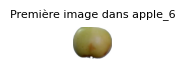

    📁 apple_braeburn_1


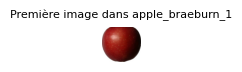

    📁 apple_crimson_snow_1


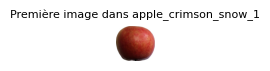

    📁 apple_golden_1


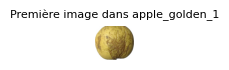

    📁 apple_golden_2


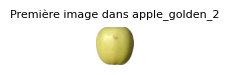

    📁 apple_golden_3


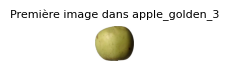

    📁 apple_granny_smith_1


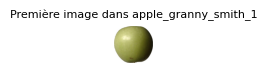

    📁 apple_hit_1


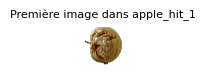

    📁 apple_pink_lady_1


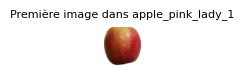

    📁 apple_red_1


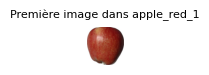

    📁 apple_red_2


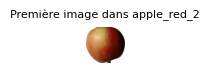

    📁 apple_red_3


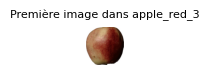

    📁 apple_red_delicios_1


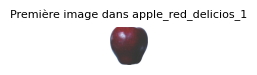

    📁 apple_red_yellow_1


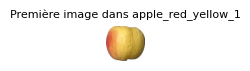

    📁 apple_rotten_1


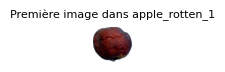

    📁 cabbage_white_1


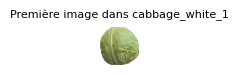

    📁 carrot_1


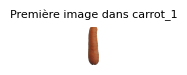

    📁 cucumber_1


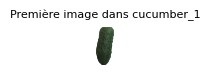

    📁 cucumber_3


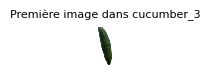

    📁 eggplant_violet_1


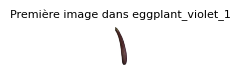

    📁 pear_1


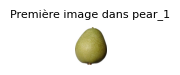

    📁 pear_3


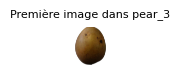

    📁 zucchini_1


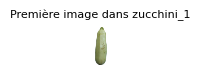

    📁 zucchini_dark_1


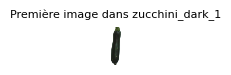

In [3]:
print_directory_tree(PATH_Data)

In [4]:
print_directory_tree_count(PATH_Data)

📂 Test
    📁 apple_6 - 157 images
    📁 apple_braeburn_1 - 160 images
    📁 apple_crimson_snow_1 - 159 images
    📁 apple_golden_1 - 154 images
    📁 apple_golden_2 - 154 images
    📁 apple_golden_3 - 158 images
    📁 apple_granny_smith_1 - 160 images
    📁 apple_hit_1 - 234 images
    📁 apple_pink_lady_1 - 156 images
    📁 apple_red_1 - 154 images
    📁 apple_red_2 - 159 images
    📁 apple_red_3 - 140 images
    📁 apple_red_delicios_1 - 150 images
    📁 apple_red_yellow_1 - 154 images
    📁 apple_rotten_1 - 159 images
    📁 cabbage_white_1 - 47 images
    📁 carrot_1 - 50 images
    📁 cucumber_1 - 50 images
    📁 cucumber_3 - 81 images
    📁 eggplant_violet_1 - 80 images
    📁 pear_1 - 162 images
    📁 pear_3 - 72 images
    📁 zucchini_1 - 80 images
    📁 zucchini_dark_1 - 80 images


### 2.2 Class Distribution

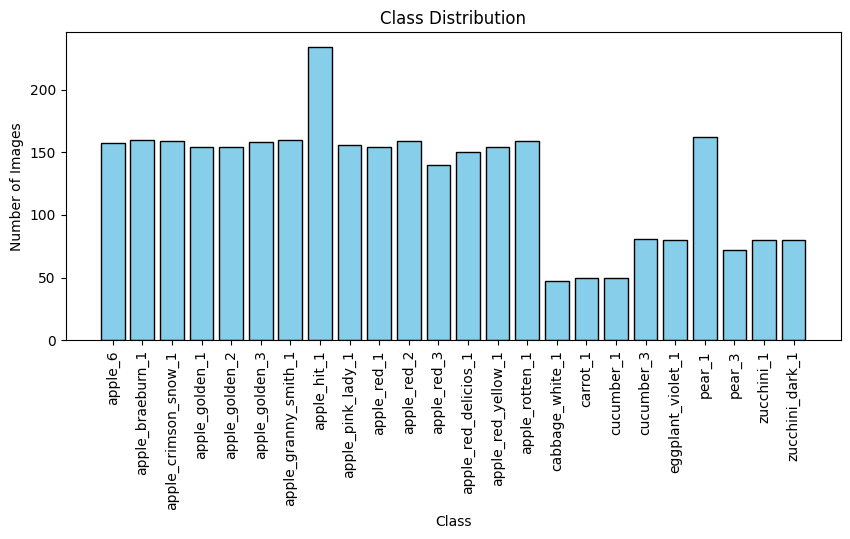

In [6]:
class_distribution(PATH_Data)

#### Observations
1. **Variabilité des Classes** :
   - Il y a une variabilité notable dans le nombre d'images par classe.
   - Les classes telles que `apple_granny_smith_1`, `apple_red_1`, et `eggplant_violet_1` ont un nombre plus élevé d'images (environ 200-220 images).
   - D'autres classes, comme `cabbage_white_1` et `cucumber_3`, ont beaucoup moins d'images (environ 50-70 images).

2. **Classes Équilibrées** :
   - Les classes `apple_granny_smith_1`, `pear_1`, `cucumber_3`, et `zucchini_1` sont parmi les plus équilibrées en termes de nombre d'images, avec environ 80 à 160 images chacune.

#### Choix des Quatre Catégories Équilibrées
Pour notre étude, il est essentiel de choisir des catégories avec un nombre équilibré d'images afin de garantir une formation et une évaluation équitables du modèle de machine learning. Les catégories sélectionnées sont :

1. **apple_granny_smith_1** :
   - Cette classe a un nombre élevé et relativement constant d'images (160).
   - Elle représente une variété spécifique de pomme, ce qui peut aider à distinguer des caractéristiques précises.

2. **pear_1** :
   - Avec un nombre similaire d'images (162), cette classe est bien représentée.
   - Elle permet d'ajouter une diversité de fruits, ce qui enrichit la diversité des catégories étudiées.

3. **cucumber_3** :
   - Cette classe a un nombre suffisant d'images (81), ce qui en fait une bonne candidate pour une étude équilibrée.
   - Elle apporte une diversité de type de légume, contrastant avec les fruits.

4. **zucchini_1** :
   - Avec 80 images, cette classe est bien représentée et équilibrée par rapport aux autres classes sélectionnées.
   - Elle ajoute une variété de légume différente, enrichissant ainsi la diversité des catégories étudiées.

Ces choix permettent d'assurer que le modèle reçoit une quantité de données suffisante et équilibrée pour chaque classe, ce qui est crucial pour des performances optimales et une évaluation juste.

### 2.3 Distribution des Hauteurs et largeurs

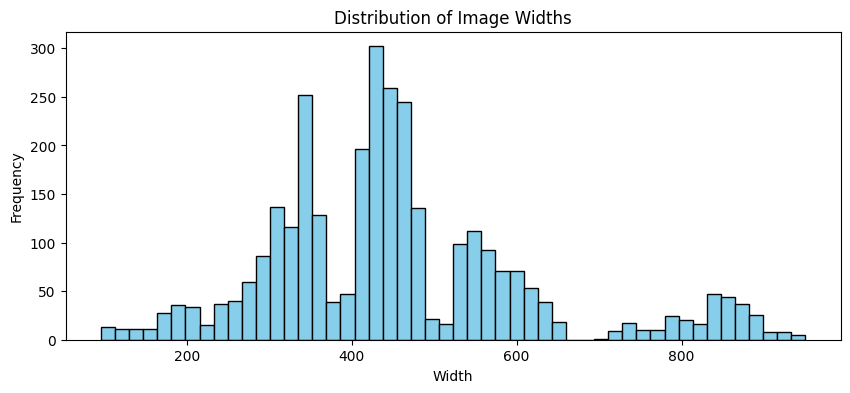

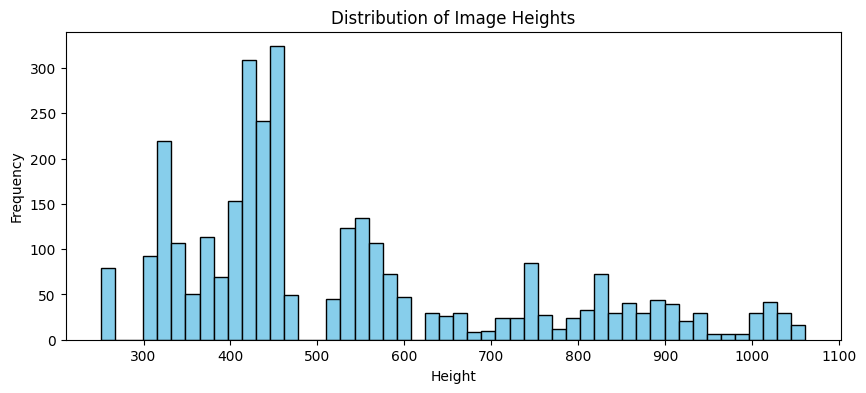

In [5]:
image_size_distribution(PATH_Data)

#### Distribution de la Hauteur des Images

**Forme de la Distribution :**

L'histogramme montre une distribution multimodale, indiquant plusieurs pics dans les données. La distribution est asymétrique vers la gauche, avec la majorité des hauteurs d'images regroupées entre 300 et 500 pixels.

**Pics de Fréquence :**

Il y a des pics notables autour des hauteurs de 300-350 pixels et 450-500 pixels, avec le pic le plus élevé autour de 500 pixels. Cela suggère que de nombreuses images ont des hauteurs dans ces gammes.

**Plage :**

La hauteur des images varie d'environ 200 pixels à plus de 1000 pixels. Il y a moins d'images avec des hauteurs supérieures à 600 pixels, et ces hauteurs apparaissent sporadiquement.

#### Distribution de la Largeur des Images

**Forme de la Distribution :**

L'histogramme montre également une distribution multimodale avec plusieurs pics. La distribution des largeurs semble moins asymétrique par rapport aux hauteurs mais montre toujours une concentration vers l'extrémité inférieure.

**Pics de Fréquence :**

Des pics significatifs sont observés autour de 400-500 pixels, avec la fréquence la plus élevée autour de 400 pixels. Comme pour la distribution de la hauteur, cela suggère que de nombreuses images ont des largeurs dans cette plage.

**Plage :**

La largeur des images varie d'environ 100 pixels à 900 pixels. Il y a moins d'images avec des largeurs supérieures à 600 pixels, mais ces largeurs sont plus uniformément distribuées par rapport aux hauteurs.

#### Observations Générales

Les deux distributions montrent que la majorité des images ont des dimensions relativement petites, généralement entre 300-500 pixels pour la hauteur et 200-500 pixels pour la largeur. Le regroupement des hauteurs et des largeurs autour de certaines plages indique des tailles standard communes utilisées dans l'ensemble de données. La nature multimodale des deux distributions suggère qu'il pourrait y avoir quelques normes de taille d'image couramment utilisées, ce qui explique les pics observés.

### 2.4 Différences entre images

Nous allons calculer la différence entre images en utilisant le **MSE (Mean Squared Error)** pour chaque sous-dossier.

#### Qu'est-ce que le MSE ?

Le MSE est une mesure couramment utilisée pour évaluer la similarité entre deux images. Il calcule la moyenne des carrés des différences entre les valeurs de pixel des deux images.

Pour chaque pixel des deux images, la différence entre les valeurs de pixel est calculée, puis elle est mise au carré. Ensuite, toutes ces différences au carré sont moyennées pour obtenir une seule valeur qui représente l'erreur quadratique moyenne entre les deux images.

Une valeur de MSE plus faible indique une plus grande similarité entre les images, tandis qu'une valeur plus élevée indique une plus grande différence.

#### Formule du MSE

Voici une formule pour calculer le MSE entre deux images A et B :

`MSE = (1 / (m * n)) * Σ(i=1 to m) Σ(j=1 to n) (A(i,j) - B(i,j))^2`

où m et n sont les dimensions des images A et B, A(i,j) est la valeur du pixel (i,j) dans l'image A, et B(i,j) est la valeur du pixel correspondant dans l'image B.

In [19]:
calculate_average_mse(PATH_Data)

Average MSE for cucumber_3: 0.5039010431271174
Average MSE for zucchini_1: 0.039984845090060575
Average MSE for eggplant_violet_1: 0.819878872307832
Average MSE for apple_red_yellow_1: 0.2223830180512842
Average MSE for apple_crimson_snow_1: 0.1227337766108603
Average MSE for pear_1: 0.21814232797018862
Average MSE for apple_red_delicios_1: 0.1934729710623934
Average MSE for apple_rotten_1: 0.19269970814960616
Average MSE for apple_golden_3: 0.11211556807380742
Average MSE for apple_golden_2: 0.0825270816466765
Average MSE for apple_red_1: 0.16190522789345568
Average MSE for carrot_1: 0.19650694828175055
Average MSE for apple_granny_smith_1: 0.09207881103573468
Average MSE for apple_braeburn_1: 0.2013861984678091
Average MSE for cabbage_white_1: 0.07342016743440216
Average MSE for cucumber_1: 0.17364077917309909
Average MSE for pear_3: 0.11804350814750816
Average MSE for apple_hit_1: 0.16354016169688232
Average MSE for apple_golden_1: 0.11703786624304234
Average MSE for apple_pink_lady

### Commentaires
- **cucumber_3** : Avec une MSE de 0.504, il y a une différence relativement élevée entre les images dans cette catégorie.

- **zucchini_1** : Une MSE de 0.040 indique une grande similarité entre les images dans cette catégorie.

- **eggplant_violet_1** : Avec une MSE de 0.820, les images dans cette catégorie sont très différentes les unes des autres.

- **apple_red_yellow_1** : Une MSE de 0.222 indique une différence modérée entre les images dans cette catégorie.

- **apple_crimson_snow_1** : Avec une MSE de 0.123, les images dans cette catégorie sont relativement similaires.

- **pear_1** : Une MSE de 0.218 indique une différence modérée entre les images dans cette catégorie.

- **apple_red_delicios_1** : Avec une MSE de 0.193, les images dans cette catégorie sont relativement similaires.

- **apple_rotten_1** : Une MSE de 0.193 indique une similarité modérée entre les images dans cette catégorie.

- **apple_golden_3** : Avec une MSE de 0.112, les images dans cette catégorie sont assez similaires.

- **apple_golden_2** : Une MSE de 0.083 indique une grande similarité entre les images dans cette catégorie.

- **apple_red_1** : Avec une MSE de 0.162, les images dans cette catégorie sont relativement similaires.

- **carrot_1** : Une MSE de 0.197 indique une similarité modérée entre les images dans cette catégorie.

- **apple_granny_smith_1** : Avec une MSE de 0.092, les images dans cette catégorie sont assez similaires.

- **apple_braeburn_1** : Une MSE de 0.201 indique une différence modérée entre les images dans cette catégorie.

- **cabbage_white_1** : Avec une MSE de 0.073, les images dans cette catégorie sont très similaires.

- **cucumber_1** : Une MSE de 0.174 indique une similarité modérée entre les images dans cette catégorie.

- **pear_3** : Avec une MSE de 0.118, les images dans cette catégorie sont relativement similaires.

- **apple_hit_1** : Une MSE de 0.164 indique une similarité modérée entre les images dans cette catégorie.

- **apple_golden_1** : Avec une MSE de 0.117, les images dans cette catégorie sont relativement similaires.

- **apple_pink_lady_1** : Une MSE de 0.134 indique une similarité modérée entre les images dans cette catégorie.

- **apple_6** : Avec une MSE de 0.125, les images dans cette catégorie sont relativement similaires.

- **zucchini_dark_1** : Une MSE de 0.400 indique une différence relativement élevée entre les images dans cette catégorie.

- **apple_red_2** : Avec une MSE de 0.159, les images dans cette catégorie sont relativement similaires.

- **apple_red_3** : Une MSE de 0.179 indique une similarité modérée entre les images dans cette catégorie.